In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score, r2_score
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#import the data
train = pd.read_csv("C:/Users/hp/Downloads/train.csv")
test = pd.read_csv("C:/Users/hp/Downloads/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# TRAIN_DATA 

In [3]:
#overall information
train.info() 
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
(891, 12)


In [4]:
#checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#removing unnecessary columns 
train.drop(columns=["PassengerId","Name","Ticket","Fare","Cabin","Embarked"],inplace = True)

In [6]:
#fill the null values of the necessary columns 
train["Age"]=train["Age"].fillna(train["Age"].mean())

In [7]:
#rechecking for null values
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [8]:
#categorical columns 
cat_col = ["Pclass", "Sex"]

In [9]:
#using the method of mapping

sex = {"female":0, "male":1}

In [10]:
train["Sex"]= train["Sex"].map(sex)

In [11]:
train["Sex"].unique()

array([1, 0], dtype=int64)

In [12]:
#correlation matrix
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000


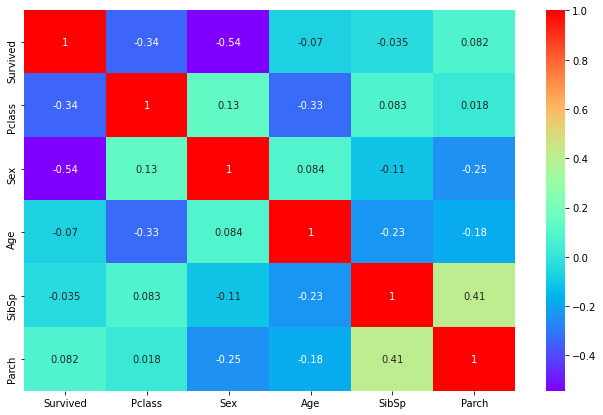

In [13]:
#visualization of the matrix
plt.figure(figsize=(11,7))
sns.heatmap(train.corr(), annot = True, cmap="rainbow");

# DECISION TREE MODEL

In [14]:
#differentiate the dependent and independent columns
X = train.drop(columns=["Survived"], axis = 1)
y = train["Survived"]

In [15]:
#split the train dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [16]:
model1 = DecisionTreeClassifier()

In [17]:
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
pred_y = model1.predict(X_test)
pred_y

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [19]:
#model evaluation 
model1.score(X_train, y_train) #model score

0.9241573033707865

In [20]:
#accuracy score, precision score and recall score

accuracy = accuracy_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
r2 = r2_score(y_test, pred_y)

print(f" accuracy: {accuracy}")
print(f" precision: {precision}")
print(f" recall: {recall}")
print(f"r2 score: {r2}")

 accuracy: 0.776536312849162
 precision: 0.7142857142857143
 recall: 0.7142857142857143
r2 score: 0.0615989515072084


In [21]:
#confusion matrix
confusion = confusion_matrix(y_test, pred_y)
confusion

array([[89, 20],
       [20, 50]], dtype=int64)

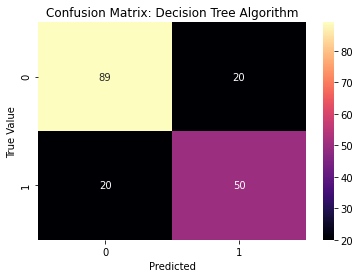

In [22]:
#visualization of the matrix
sns.heatmap(confusion, annot=True,cmap="magma")
plt.title("Confusion Matrix: Decision Tree Algorithm")
plt.xlabel("Predicted")
plt.ylabel("True Value");

In [23]:
r2 = r2_score(y_test, pred_y)
r2

0.0615989515072084

overview
1. the model predictss 88 true negatives
2. the model predicts 50 true positives
3. the model predicts 21 false positive
4. the model predicts 20 false negatives

# Logistics Regression Model

In [24]:
model2 = LogisticRegression()

In [25]:
model2.fit(X_train, y_train)

LogisticRegression()

In [26]:
#model evaluation 
model2.score(X_train, y_train) #model score

0.8075842696629213

In [27]:
pred_y = model2.predict(X_test)
pred_y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [28]:
#accuracy score, precision score and recall score

accuracy = accuracy_score(y_test, pred_y)
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
r2 = r2_score(y_test, pred_y)

print(f" accuracy: {accuracy}")
print(f" precision: {precision}")
print(f" recall: {recall}")
print(f"r2 score: {r2}")

 accuracy: 0.776536312849162
 precision: 0.6973684210526315
 recall: 0.7571428571428571
r2 score: 0.0615989515072084


In [29]:
#confusion matrix
confusion = confusion_matrix(y_test, pred_y)
confusion

array([[86, 23],
       [17, 53]], dtype=int64)

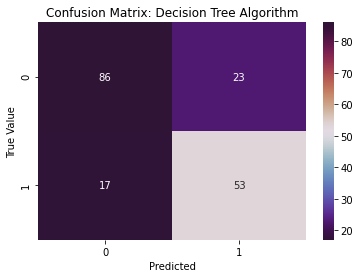

In [30]:
#visualization of the matrix
sns.heatmap(confusion, annot=True,cmap="twilight_shifted")
plt.title("Confusion Matrix: Decision Tree Algorithm")
plt.xlabel("Predicted")
plt.ylabel("True Value");

overview

1.the model predictss 86 true negatives
2.the model predicts 53 true positives
3.the model predicts 23 false positive
4.the model predicts 17 false negatives

# CONCLUSION

Using two most suited algorithms based on the binary outcome- 0 & 1, we adopted both DecisionTree Algorithm & Logistics Regression Algorithm so as to choose the one with the best score; our conclusion goes thus;
1. Decision Tree model gives a score of 92% while Logistics Regression gives a score of 81%
2. Decision Tree Prediction gives an accuracy score of 78% while Logistics RegreRegression gives 78% also
3. The true negatives of Decision Tree is 88 while that of Logistics Regression is 86

# Prediction using the test dataset

In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
test.drop(columns=["Name","Ticket","Fare","Cabin","Embarked"],inplace = True)

In [34]:
test_value = test.drop(columns=["PassengerId"])
PassengerId = "PassengerId "

In [46]:
test_value["Age"]=test_value["Age"].fillna(test_value["Age"].mean())

In [36]:
#mapping sex
sex= {"male":1, "female":0}

In [41]:
test_value["Sex"]=test_value["Sex"].map(sex)


In [42]:
test_value["Sex"].unique()

array([1, 0], dtype=int64)

In [43]:
test_value.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1


In [47]:
test_value.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64

In [48]:
predictions = model1.predict(test_value)

In [53]:
predictions = pd.DataFrame(predictions)

In [51]:
predictions["PassengerId"]=test["PassengerId"]
predictions = predictions.rename(columns ={0:"Survived"})
predictions= predictions.set_index("PassengerId")

In [54]:
predictions.head(10)

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1
